In [1]:
#ループ強化学習した結果強かったパーティの表示
# 各iterationから代表100パーティずつが対戦

In [2]:
from pokeai.ai.party_db import col_party, col_rate, pack_obj, unpack_obj
from bson import ObjectId
import numpy as np
import matplotlib.pyplot as plt
from pokeai.util import json_load, pickle_load, ROOT_DIR, DATASET_DIR

In [3]:
file_base_dir = r"D:\dev\pokeai\pokeai\experiment\team\rl\rl_loop_210227_1"

In [4]:
iter_ids = json_load(file_base_dir+"/iter_ids.json")
iter_ids

[{'iternum': 0,
  'trainer_id': '6039caccaf28292a4eae380a',
  'train_party_tags': ['rl_loop_210227_1_allonce_0', 'rl_loop_210227_1_hc_0'],
  'gen_party_tag': 'rl_loop_210227_1_hc_1',
  'rate_id': '6049e2cd3410a8cbf644a642'},
 {'iternum': 1,
  'trainer_id': '6039caccaf28292a4eae380b',
  'train_party_tags': ['rl_loop_210227_1_allonce_1', 'rl_loop_210227_1_hc_1'],
  'gen_party_tag': 'rl_loop_210227_1_hc_2',
  'rate_id': '6049e2cd3410a8cbf644a643'},
 {'iternum': 2,
  'trainer_id': '6039caccaf28292a4eae380c',
  'train_party_tags': ['rl_loop_210227_1_allonce_2', 'rl_loop_210227_1_hc_2'],
  'gen_party_tag': 'rl_loop_210227_1_hc_3',
  'rate_id': '6049e2cd3410a8cbf644a644'},
 {'iternum': 3,
  'trainer_id': '6039caccaf28292a4eae380d',
  'train_party_tags': ['rl_loop_210227_1_allonce_3', 'rl_loop_210227_1_hc_3'],
  'gen_party_tag': 'rl_loop_210227_1_hc_4',
  'rate_id': '6049e2cd3410a8cbf644a645'},
 {'iternum': 4,
  'trainer_id': '6039caccaf28292a4eae380e',
  'train_party_tags': ['rl_loop_210227_1

In [5]:
rates = col_rate.find_one({"_id": ObjectId("6055d9f0fffed4b6a7401663")})["rates"]

In [6]:
def load_parties(player_ids):
    party_ids = {player_id.split('+')[1] for player_id in player_ids}
    return {party_id:col_party.find_one({"_id":ObjectId(party_id)})["party"] for party_id in party_ids}

In [7]:
parties = load_parties(rates.keys())

In [8]:
name2jp = json_load(DATASET_DIR.joinpath("name2jp.json"))["name2jp"]
def print_party(p):
    rows = []
    for poke in p:
        rows.append(",".join([name2jp[poke["species"]],"LV"+str(poke["level"]), *[name2jp[move] for move in poke["moves"]]]))
    return "<br>".join(rows)

In [9]:
def get_mean_by_prefix(rates, prefix):
    f_rates = []
    for player_id, rate in rates.items():
        if player_id.startswith(prefix):
            f_rates.append(rate)
    return np.mean(f_rates)

In [10]:
xs = []
mean_rates = []
for iter_id in iter_ids:
    xs.append(iter_id["iternum"])
    mean_rates.append(get_mean_by_prefix(rates, iter_id["trainer_id"]))
mean_rates

[1304.176246246185,
 1490.646428968989,
 1536.420924955397,
 1553.2953152183418,
 1545.4671951621328,
 1516.1954393275128,
 1518.6871961377608,
 1506.024796546256,
 1517.4983870520173,
 1511.5880703854084]

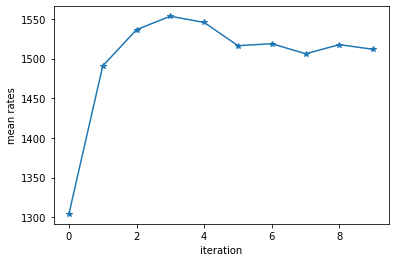

In [11]:
plt.plot(xs, mean_rates, marker="*")
plt.xlabel("iteration")
plt.ylabel("mean rates")
plt.show()

In [12]:
rate_tuples = [(rate, player_id) for player_id, rate in rates.items()]
rate_tuples.sort()

In [13]:
rate_tuples

[(1112.405821316388, '6039caccaf28292a4eae380a+6039cb55a94ca9f4750c01f1'),
 (1149.7397405994416, '6039caccaf28292a4eae380a+6039cb56a94ca9f4750c02c7'),
 (1151.213334013218, '6039caccaf28292a4eae380a+6039cb55a94ca9f4750c026b'),
 (1158.5854952113755, '6039caccaf28292a4eae380a+6039cb54a94ca9f4750c00d1'),
 (1159.7284529903568, '6039caccaf28292a4eae380a+6039cb56a94ca9f4750c03e6'),
 (1161.0672854279892, '6039caccaf28292a4eae380a+6039cb57a7599bf91d5abf2c'),
 (1161.8953509346313, '6039caccaf28292a4eae380a+6039cb56a94ca9f4750c0412'),
 (1166.2488685360179, '6039caccaf28292a4eae380a+6039cb56a94ca9f4750c0322'),
 (1169.829045332016, '6039caccaf28292a4eae380a+6039cb55a94ca9f4750c014b'),
 (1170.2500580011376, '6039caccaf28292a4eae380a+6039cb56a94ca9f4750c02b4'),
 (1177.0819485121663, '6039caccaf28292a4eae380a+6039cb55a94ca9f4750c010e'),
 (1180.174795337135, '6039caccaf28292a4eae380a+6039cb55a94ca9f4750c017b'),
 (1182.843026302113, '6039caccaf28292a4eae380a+6039cb56a94ca9f4750c0405'),
 (1185.5056343554

In [14]:
for rate, player_id in rate_tuples[:-51:-1]:
    print(rate, player_id)
    print(print_party(parties[player_id.split("+")[1]]))

1821.3462773713657 6039caccaf28292a4eae380c+603c5981fd3b50ff58cb0337
カビゴン,LV55,かいりき,のしかかり,じしん,ソーラービーム<br>ミルタンク,LV50,のしかかり,どろかけ,じしん,かいりき<br>メガニウム,LV50,のしかかり,ソーラービーム,かいりき,どろかけ
1797.6497893231751 6039caccaf28292a4eae380f+604214506135860afacbf51a
カビゴン,LV55,のしかかり,じしん,ソーラービーム,かえんほうしゃ<br>ギャロップ,LV50,つのドリル,ふみつけ,かえんほうしゃ,のしかかり<br>ケンタロス,LV50,ふみつけ,かえんほうしゃ,のしかかり,つのドリル
1789.1432013000212 6039caccaf28292a4eae380c+603c5981fd3b50ff58cb0416
カビゴン,LV55,のしかかり,じしん,かいりき,いわくだき<br>プテラ,LV50,じしん,スピードスター,いわくだき,はがねのつばさ<br>グライガー,LV50,じしん,かいりき,スピードスター,いわくだき
1784.8970902340627 6039caccaf28292a4eae380c+603c5981fd3b50ff58cb0393
カビゴン,LV55,じしん,ちきゅうなげ,のしかかり,どろかけ<br>ニョロボン,LV50,ちきゅうなげ,どろかけ,ハイドロポンプ,のしかかり<br>サワムラー,LV50,かいりき,ロケットずつき,どろかけ,のしかかり
1769.395927226767 6039caccaf28292a4eae380b+603b1e7034e974c9b27ba1d8
カビゴン,LV55,かえんほうしゃ,サイコキネシス,のしかかり,じしん<br>サンダー,LV50,ドリルくちばし,１０まんボルト,どろかけ,かみなり<br>ドククラゲ,LV50,ふぶき,なみのり,ハイドロポンプ,ヘドロばくだん
1768.721019399239 6039caccaf28292a4eae3811+6044a4b7aa5b0c5c23d520f0
カビゴン,LV50,じしん,のしかかり,かみなり,すてみタックル<br>ドード

In [15]:
for rate, player_id in rate_tuples[:10]:
    print(rate, player_id)
    print(print_party(parties[player_id.split("+")[1]]))

1112.405821316388 6039caccaf28292a4eae380a+6039cb55a94ca9f4750c01f1
サンダー,LV50,でんじほう,そらをとぶ,はがねのつばさ,はかいこうせん<br>ムウマ,LV50,１０まんボルト,どくどく,ずつき,おんがえし<br>モルフォン,LV55,ギガドレイン,とっしん,はかいこうせん,すてみタックル
1149.7397405994416 6039caccaf28292a4eae380a+6039cb56a94ca9f4750c02c7
スターミー,LV55,スピードスター,なみのり,おんがえし,はかいこうせん<br>バリヤード,LV50,のしかかり,おんがえし,かげぶんしん,どろかけ<br>シャワーズ,LV50,とっしん,ハイドロポンプ,おんがえし,れいとうビーム
1151.213334013218 6039caccaf28292a4eae380a+6039cb55a94ca9f4750c026b
ギャロップ,LV50,かえんほうしゃ,ロケットずつき,つのドリル,とっしん<br>ミルタンク,LV50,ふぶき,かみなり,ちきゅうなげ,れいとうパンチ<br>カブトプス,LV55,ちきゅうなげ,ハイドロポンプ,れいとうビーム,はかいこうせん
1158.5854952113755 6039caccaf28292a4eae380a+6039cb54a94ca9f4750c00d1
バクフーン,LV50,どろかけ,すてみタックル,いわくだき,ばくれつパンチ<br>ケンタロス,LV50,つのドリル,じしん,１０まんボルト,のしかかり<br>サンドパン,LV55,のしかかり,すなあらし,いわくだき,かいりき
1159.7284529903568 6039caccaf28292a4eae380a+6039cb56a94ca9f4750c03e6
キレイハナ,LV50,とっしん,すてみタックル,おんがえし,はなびらのまい<br>ハピナス,LV50,バブルこうせん,のしかかり,１０まんボルト,はかいこうせん<br>ムウマ,LV55,ずつき,サイコキネシス,かげぶんしん,１０まんボルト
1161.0672854279892 6039caccaf28292a4eae380a+6039cb57a7599bf91d5abf2c
ポリ

In [16]:
print("|レート|パーティ|")
print("|---|---|")
for rate, player_id in rate_tuples[:-11:-1]:
    print(f"|{int(rate)}|{print_party(parties[player_id.split('+')[1]])}|")

|レート|パーティ|
|---|---|
|1821|カビゴン,LV55,かいりき,のしかかり,じしん,ソーラービーム<br>ミルタンク,LV50,のしかかり,どろかけ,じしん,かいりき<br>メガニウム,LV50,のしかかり,ソーラービーム,かいりき,どろかけ|
|1797|カビゴン,LV55,のしかかり,じしん,ソーラービーム,かえんほうしゃ<br>ギャロップ,LV50,つのドリル,ふみつけ,かえんほうしゃ,のしかかり<br>ケンタロス,LV50,ふみつけ,かえんほうしゃ,のしかかり,つのドリル|
|1789|カビゴン,LV55,のしかかり,じしん,かいりき,いわくだき<br>プテラ,LV50,じしん,スピードスター,いわくだき,はがねのつばさ<br>グライガー,LV50,じしん,かいりき,スピードスター,いわくだき|
|1784|カビゴン,LV55,じしん,ちきゅうなげ,のしかかり,どろかけ<br>ニョロボン,LV50,ちきゅうなげ,どろかけ,ハイドロポンプ,のしかかり<br>サワムラー,LV50,かいりき,ロケットずつき,どろかけ,のしかかり|
|1769|カビゴン,LV55,かえんほうしゃ,サイコキネシス,のしかかり,じしん<br>サンダー,LV50,ドリルくちばし,１０まんボルト,どろかけ,かみなり<br>ドククラゲ,LV50,ふぶき,なみのり,ハイドロポンプ,ヘドロばくだん|
|1768|カビゴン,LV50,じしん,のしかかり,かみなり,すてみタックル<br>ドードリオ,LV55,そらをとぶ,すてみタックル,のしかかり,ゴッドバード<br>ガルーラ,LV50,かみなり,じしん,のしかかり,すてみタックル|
|1767|カビゴン,LV55,じしん,かみなりパンチ,どろかけ,のしかかり<br>ミルタンク,LV50,かみなりパンチ,のしかかり,どろかけ,じしん<br>エアームド,LV50,どろかけ,ゴッドバード,はがねのつばさ,そらをとぶ|
|1767|バンギラス,LV55,げんしのちから,１０まんボルト,じしん,かえんほうしゃ<br>ギャラドス,LV50,１０まんボルト,たきのぼり,のしかかり,かえんほうしゃ<br>ガルーラ,LV50,のしかかり,１０まんボルト,じしん,かえんほうしゃ|
|1765|カビゴン,LV55,おんがえし,サイコキネシス,かえんほ

In [17]:
print("|レート|パーティ|")
print("|---|---|")
for rate, player_id in rate_tuples[:10]:
    print(f"|{int(rate)}|{print_party(parties[player_id.split('+')[1]])}|")

|レート|パーティ|
|---|---|
|1112|サンダー,LV50,でんじほう,そらをとぶ,はがねのつばさ,はかいこうせん<br>ムウマ,LV50,１０まんボルト,どくどく,ずつき,おんがえし<br>モルフォン,LV55,ギガドレイン,とっしん,はかいこうせん,すてみタックル|
|1149|スターミー,LV55,スピードスター,なみのり,おんがえし,はかいこうせん<br>バリヤード,LV50,のしかかり,おんがえし,かげぶんしん,どろかけ<br>シャワーズ,LV50,とっしん,ハイドロポンプ,おんがえし,れいとうビーム|
|1151|ギャロップ,LV50,かえんほうしゃ,ロケットずつき,つのドリル,とっしん<br>ミルタンク,LV50,ふぶき,かみなり,ちきゅうなげ,れいとうパンチ<br>カブトプス,LV55,ちきゅうなげ,ハイドロポンプ,れいとうビーム,はかいこうせん|
|1158|バクフーン,LV50,どろかけ,すてみタックル,いわくだき,ばくれつパンチ<br>ケンタロス,LV50,つのドリル,じしん,１０まんボルト,のしかかり<br>サンドパン,LV55,のしかかり,すなあらし,いわくだき,かいりき|
|1159|キレイハナ,LV50,とっしん,すてみタックル,おんがえし,はなびらのまい<br>ハピナス,LV50,バブルこうせん,のしかかり,１０まんボルト,はかいこうせん<br>ムウマ,LV55,ずつき,サイコキネシス,かげぶんしん,１０まんボルト|
|1161|ポリゴン２,LV50,どくどく,サイコキネシス,すてみタックル,かみなり<br>ガラガラ,LV50,とっしん,バブルこうせん,かげぶんしん,ずつき<br>ドククラゲ,LV55,どくどく,ギガドレイン,ハイドロポンプ,かげぶんしん|
|1161|シャワーズ,LV55,ふぶき,とっしん,スピードスター,なみのり<br>フーディン,LV50,ちきゅうなげ,サイコキネシス,ほのおのパンチ,れいとうパンチ<br>マンタイン,LV50,おんがえし,ふぶき,どろかけ,なみのり|
|1166|ランターン,LV50,なみのり,かげぶんしん,おんがえし,かみなり<br>ヤドキング,LV55,れいとうパンチ,かえんほうしゃ,ばくれつパンチ,おんがえし<br>ハッサム,LV50,すてみタックル,かげぶんしん,いあいぎり

In [18]:
pokes = []
for rate, player_id in rate_tuples:
    pokes.extend(p["species"] for p in parties[player_id.split("+")[1]])

In [19]:
moves = []
for rate, player_id in rate_tuples:
    for p in parties[player_id.split("+")[1]]:
        moves.extend(p["moves"])

In [20]:
from collections import Counter

In [21]:
def display_hindo(items):
    c = Counter(items)
    print("|要素|出現回数|")
    print("|---|---|")
    for k, v in c.most_common():
        print(f"|{name2jp[k]}|{v}|")

In [22]:
display_hindo(pokes)

|要素|出現回数|
|---|---|
|カビゴン|449|
|サンダー|133|
|バンギラス|129|
|ライコウ|82|
|ケンタロス|69|
|ガルーラ|63|
|スターミー|56|
|ミルタンク|42|
|シャワーズ|41|
|プテラ|41|
|ハピナス|38|
|サンダース|37|
|キングドラ|36|
|ヌオー|36|
|フーディン|35|
|カメックス|35|
|ゲンガー|35|
|ラプラス|33|
|イノムー|32|
|スイクン|32|
|ランターン|31|
|ドンファン|31|
|サイドン|31|
|バクフーン|30|
|ヤドラン|30|
|ニドクイン|29|
|エンテイ|29|
|リングマ|28|
|ギャラドス|27|
|ベトベトン|27|
|メガニウム|27|
|ピクシー|26|
|エレブー|25|
|カイリュー|25|
|ハガネール|24|
|オーダイル|24|
|ゴローニャ|23|
|サンドパン|22|
|ドククラゲ|21|
|レアコイル|21|
|スリーパー|21|
|ムウマ|20|
|ヤドキング|20|
|ウインディ|20|
|ニドキング|20|
|ファイヤー|20|
|デンリュウ|20|
|ニョロボン|20|
|ポリゴン２|18|
|ハッサム|18|
|ナッシー|18|
|エーフィ|18|
|ブースター|18|
|フリーザー|18|
|ライチュウ|17|
|ニョロトノ|17|
|ペルシアン|17|
|ゴルダック|17|
|ヘラクロス|17|
|グライガー|16|
|マンタイン|15|
|ジュゴン|15|
|キングラー|15|
|サワムラー|15|
|エアームド|15|
|オオタチ|15|
|パルシェン|15|
|プクリン|15|
|アーボック|15|
|リザードン|15|
|ギャロップ|14|
|カイリキー|14|
|ニューラ|14|
|オムスター|14|
|フシギバナ|14|
|ラフレシア|13|
|ヘルガー|13|
|ネイティオ|13|
|カブトプス|12|
|ウツボット|12|
|キュウコン|12|
|ルージュラ|12|
|オドシシ|12|
|キリンリキ|12|
|エビワラー|12|
|ドードリオ|11|
|ブーバー|11|
|オニドリル|11|
|グランブル|11|
|ブラッキー|11|
|フォレトス|10|
|ハリーセン|

In [23]:
display_hindo(moves)

|要素|出現回数|
|---|---|
|のしかかり|907|
|じしん|767|
|おんがえし|739|
|１０まんボルト|453|
|すてみタックル|399|
|どろかけ|379|
|はかいこうせん|371|
|れいとうビーム|370|
|どくどく|363|
|ずつき|363|
|かげぶんしん|356|
|とっしん|343|
|いわくだき|312|
|でんじほう|295|
|かみなり|293|
|かいりき|279|
|バブルこうせん|274|
|だいもんじ|274|
|なみのり|266|
|かえんほうしゃ|261|
|ばくれつパンチ|261|
|ロケットずつき|255|
|すなあらし|222|
|ふぶき|221|
|スピードスター|197|
|ちきゅうなげ|197|
|ほのおのパンチ|194|
|れいとうパンチ|175|
|げんしのちから|168|
|かみなりパンチ|168|
|ころがる|161|
|ソーラービーム|153|
|いあいぎり|144|
|サイコキネシス|140|
|たきのぼり|118|
|ドリルくちばし|116|
|ヘドロばくだん|98|
|ハイドロポンプ|94|
|はがねのつばさ|92|
|ふみつけ|89|
|そらをとぶ|84|
|ゴッドバード|79|
|ギガドレイン|75|
|サイケこうせん|68|
|つのでつく|68|
|つばさでうつ|60|
|つのドリル|53|
|はなびらのまい|47|
|やどりぎのタネ|39|
|どくのこな|35|
|ナイトヘッド|33|
|はっぱカッター|32|
